In [1]:

import pandas as pd

# Load datasets
airlines = pd.read_csv('Data/airlines.csv', delimiter=';', quotechar='"')
airports = pd.read_csv('Data/airports.csv', delimiter=';', quotechar='"')
flights = pd.read_csv('Data/flights.csv', delimiter=';', quotechar='"')
planes = pd.read_csv('Data/planes.csv', delimiter=';', quotechar='"')
weather = pd.read_csv('Data/weather.csv', delimiter=';', quotechar='"')

# Display basic information about the datasets
print("Airlines shape:", airlines.shape)
print("Airports shape:", airports.shape)
print("Flights shape:", flights.shape)
print("Planes shape:", planes.shape)
print("Weather shape:", weather.shape)
    

Airlines shape: (14, 3)
Airports shape: (1251, 9)
Flights shape: (435352, 20)
Planes shape: (4840, 10)
Weather shape: (26204, 16)


### Data Cleaning

In [2]:

# Data Cleaning Functions
def clean_airports(df):
    # Convert numeric columns to float
    df['lat'] = df['lat'].str.replace(',', '.').astype(float)
    df['lon'] = df['lon'].str.replace(',', '.').astype(float)
    # Fill missing values with placeholders or drop if needed
    df['tz'] = df['tz'].fillna(df['tz'].median())
    df['dst'] = df['dst'].fillna('Unknown')
    df['tzone'] = df['tzone'].fillna('Unknown')
    return df

def clean_flights(df):
    # Fill missing values for delays and times with meaningful placeholders
    df['dep_time'] = df['dep_time'].fillna(0)  # 0 represents missing departure time
    df['arr_time'] = df['arr_time'].fillna(0)  # 0 represents missing arrival time
    df['dep_delay'] = df['dep_delay'].fillna(0)
    df['arr_delay'] = df['arr_delay'].fillna(0)
    df['air_time'] = df['air_time'].fillna(0)
    df['tailnum'] = df['tailnum'].fillna('Unknown')
    return df

def clean_planes(df):
    # Fill missing values for year with median
    df['year'] = df['year'].fillna(df['year'].median())
    return df

def clean_weather(df):
    # Fill missing weather data with mean values for continuous fields
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        df[col] = df[col].fillna(df[col].mean())
    # Fill missing categorical data with 'Unknown'
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].fillna('Unknown')
    return df

# Apply cleaning functions
airports_cleaned = clean_airports(airports)
flights_cleaned = clean_flights(flights)
planes_cleaned = clean_planes(planes)
weather_cleaned = clean_weather(weather)

# Display summaries of cleaned data
print("Airports Data Cleaned:")
print(airports_cleaned.info(), "\n")

print("Flights Data Cleaned:")
print(flights_cleaned.info(), "\n")

print("Planes Data Cleaned:")
print(planes_cleaned.info(), "\n")

print("Weather Data Cleaned:")
print(weather_cleaned.info(), "\n")

Airports Data Cleaned:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1251 non-null   int64  
 1   faa         1251 non-null   object 
 2   name        1251 non-null   object 
 3   lat         1251 non-null   float64
 4   lon         1251 non-null   float64
 5   alt         1251 non-null   int64  
 6   tz          1251 non-null   float64
 7   dst         1251 non-null   object 
 8   tzone       1251 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 88.1+ KB
None 

Flights Data Cleaned:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435352 entries, 0 to 435351
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      435352 non-null  int64  
 1   year            435352 non-null  int64  
 2   month           435352 non-n

### ExploratoryDataAnalysis(EDA)

In [6]:
pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 9.5 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 7.3 MB/s  eta 0:00:01
     |████████████████████████████████| 2.8 MB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 10.8 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.


Summary for Airports:
         Unnamed: 0   faa                  name          lat          lon  \
count   1251.000000  1251                  1251  1251.000000  1251.000000   
unique          NaN  1251                  1248          NaN          NaN   
top             NaN   AAF  Capital City Airport          NaN          NaN   
freq            NaN     1                     3          NaN          NaN   
mean     626.000000   NaN                   NaN    40.933284  -103.465931   
std      361.276902   NaN                   NaN    10.193500    28.112110   
min        1.000000   NaN                   NaN    19.721399  -176.645996   
25%      313.500000   NaN                   NaN    34.103500  -117.876000   
50%      626.000000   NaN                   NaN    39.345100   -95.912498   
75%      938.500000   NaN                   NaN    44.316700   -83.286251   
max     1251.000000   NaN                   NaN    71.285402   174.113998   

                alt           tz   dst             tz

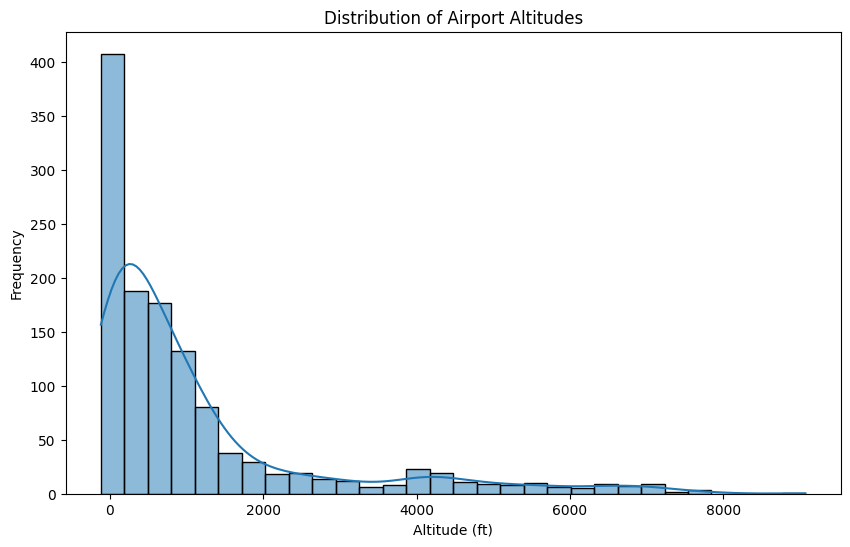

Summary for Flights:
           Unnamed: 0      year          month            day       dep_time  \
count   435352.000000  435352.0  435352.000000  435352.000000  435352.000000   
unique            NaN       NaN            NaN            NaN            NaN   
top               NaN       NaN            NaN            NaN            NaN   
freq              NaN       NaN            NaN            NaN            NaN   
mean    217676.500000    2023.0       6.422713      15.736475    1332.013644   
std     125675.441534       0.0       3.414399       8.767280     535.536426   
min          1.000000    2023.0       1.000000       1.000000       0.000000   
25%     108838.750000    2023.0       3.000000       8.000000     914.000000   
50%     217676.500000    2023.0       6.000000      16.000000    1345.000000   
75%     326514.250000    2023.0       9.000000      23.000000    1757.000000   
max     435352.000000    2023.0      12.000000      31.000000    2400.000000   

        sched_dep_

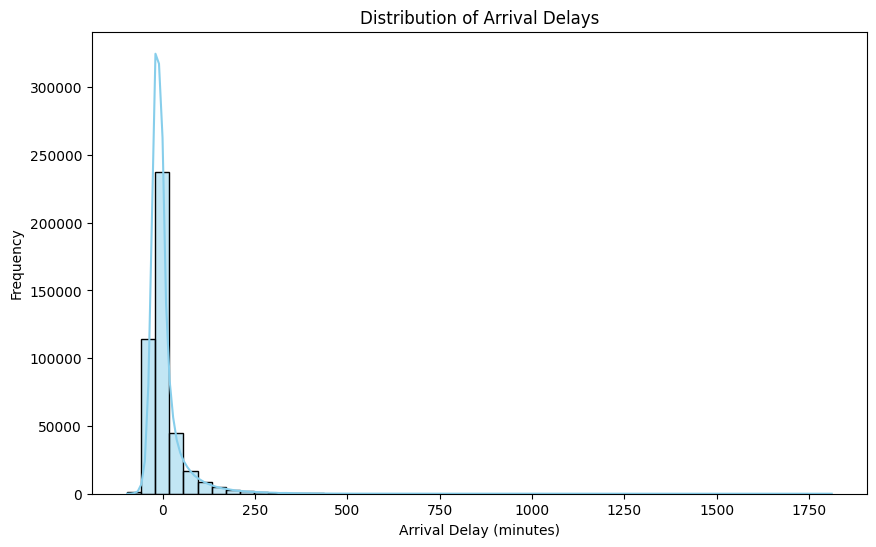

/var/folders/qh/58h6bn7574l01yyrh7gtqf6w0000gs/T/ipykernel_10595/743987346.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=flights_cleaned, x='month', y='arr_delay', palette='coolwarm')


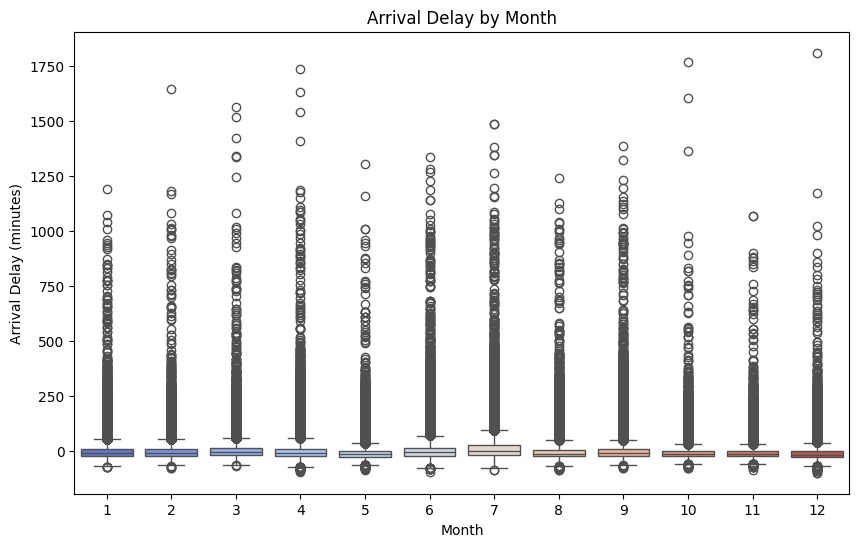

Summary for Planes:
         Unnamed: 0 tailnum         year                     type  \
count   4840.000000    4840  4840.000000                     4840   
unique          NaN    4840          NaN                        3   
top             NaN  N101DQ          NaN  Fixed wing multi engine   
freq            NaN       1          NaN                     4838   
mean    2420.500000     NaN  2010.191942                      NaN   
std     1397.331982     NaN     8.297011                      NaN   
min        1.000000     NaN  1990.000000                      NaN   
25%     1210.750000     NaN  2002.000000                      NaN   
50%     2420.500000     NaN  2012.000000                      NaN   
75%     3630.250000     NaN  2017.000000                      NaN   
max     4840.000000     NaN  2023.000000                      NaN   

       manufacturer  model      engines        seats   speed     engine  
count          4840   4840  4840.000000  4840.000000  4840.0       4840  
uni

/var/folders/qh/58h6bn7574l01yyrh7gtqf6w0000gs/T/ipykernel_10595/743987346.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=planes_cleaned, x='engines', palette='viridis')


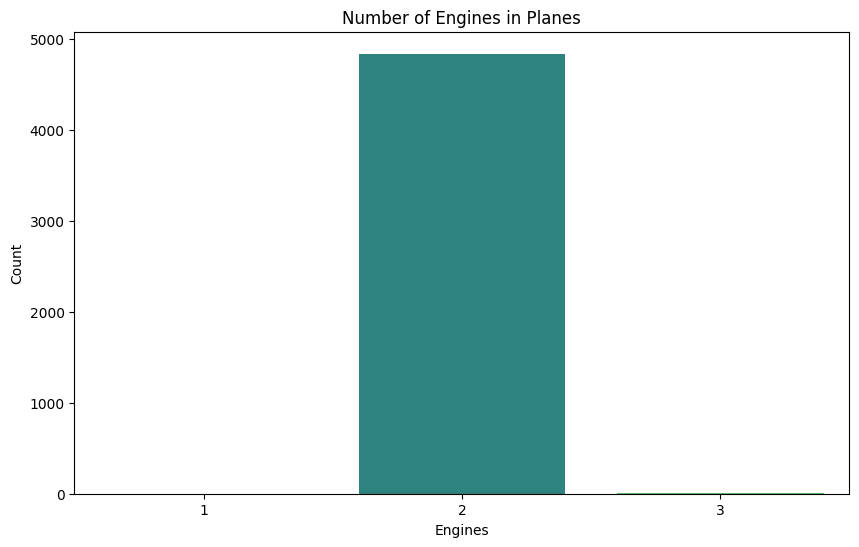

Summary for Weather:
          Unnamed: 0 origin     year         month           day  \
count   26204.000000  26204  26204.0  26204.000000  26204.000000   
unique           NaN      3      NaN           NaN           NaN   
top              NaN    JFK      NaN           NaN           NaN   
freq             NaN   8735      NaN           NaN           NaN   
mean    13102.500000    NaN   2023.0      6.511449     15.679515   
std      7564.587563    NaN      0.0      3.440720      8.772079   
min         1.000000    NaN   2023.0      1.000000      1.000000   
25%      6551.750000    NaN   2023.0      4.000000      8.000000   
50%     13102.500000    NaN   2023.0      7.000000     16.000000   
75%     19653.250000    NaN   2023.0     10.000000     23.000000   
max     26204.000000    NaN   2023.0     12.000000     31.000000   

                hour     temp     dewp    humid      wind_dir wind_speed  \
count   26204.000000    26204    26204    26204  26204.000000      26204   
unique    

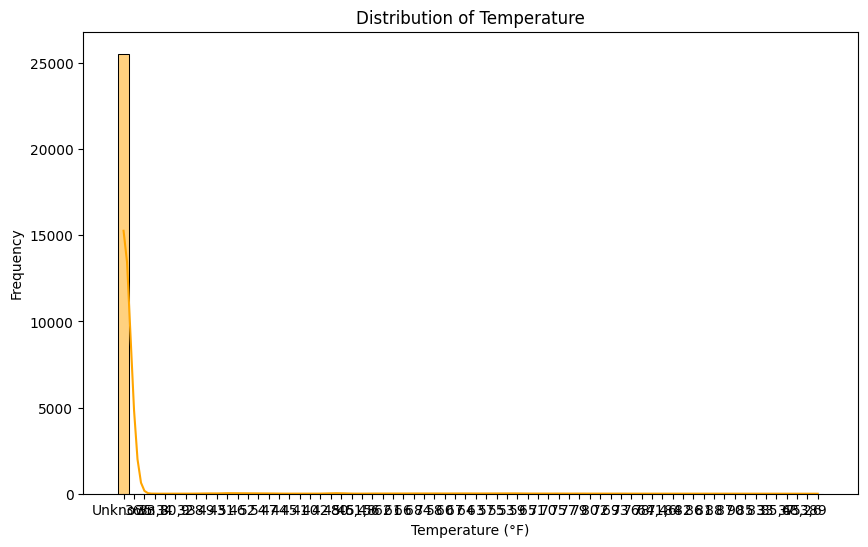

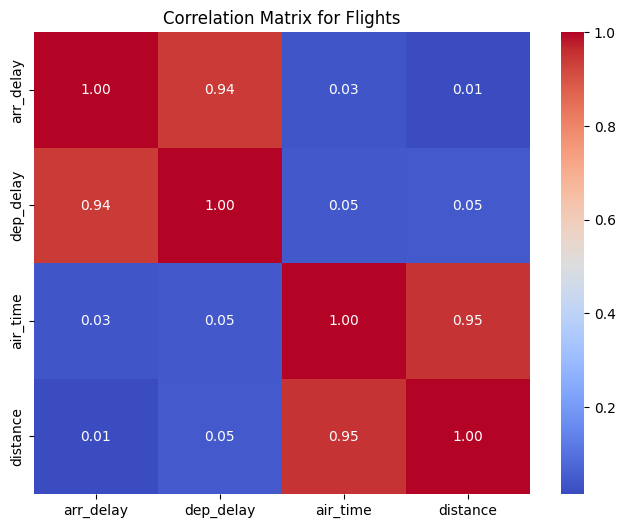

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summarize Datasets
def dataset_summary(df, name):
    print(f"Summary for {name}:")
    print(df.describe(include='all'))
    print(f"\nMissing values in {name}:\n{df.isnull().sum()}\n")
    print("-" * 50)

# Airports Dataset EDA
dataset_summary(airports_cleaned, "Airports")
plt.figure(figsize=(10, 6))
sns.histplot(airports_cleaned['alt'], kde=True, bins=30)
plt.title("Distribution of Airport Altitudes")
plt.xlabel("Altitude (ft)")
plt.ylabel("Frequency")
plt.show()

# Flights Dataset EDA
dataset_summary(flights_cleaned, "Flights")
plt.figure(figsize=(10, 6))
sns.histplot(flights_cleaned['arr_delay'], kde=True, bins=50, color='skyblue')
plt.title("Distribution of Arrival Delays")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

# Explore delay trends by month
plt.figure(figsize=(10, 6))
sns.boxplot(data=flights_cleaned, x='month', y='arr_delay', palette='coolwarm')
plt.title("Arrival Delay by Month")
plt.xlabel("Month")
plt.ylabel("Arrival Delay (minutes)")
plt.show()

# Planes Dataset EDA
dataset_summary(planes_cleaned, "Planes")
plt.figure(figsize=(10, 6))
sns.countplot(data=planes_cleaned, x='engines', palette='viridis')
plt.title("Number of Engines in Planes")
plt.xlabel("Engines")
plt.ylabel("Count")
plt.show()

# Weather Dataset EDA
dataset_summary(weather_cleaned, "Weather")
plt.figure(figsize=(10, 6))
sns.histplot(weather_cleaned['temp'], kde=True, bins=50, color='orange')
plt.title("Distribution of Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.show()

# Correlation Analysis for Flights
corr = flights_cleaned[['arr_delay', 'dep_delay', 'air_time', 'distance']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Flights")
plt.show()